## Ting Fung Lam 2924629375  
April 06, 2020  

Programming HW#10  (Due: Apr 12, 11:59 PM):  
Implement the polynomial interpolations and cubic spline interpolation algorithm and run your own codes to solve Problem 43 on page 332.


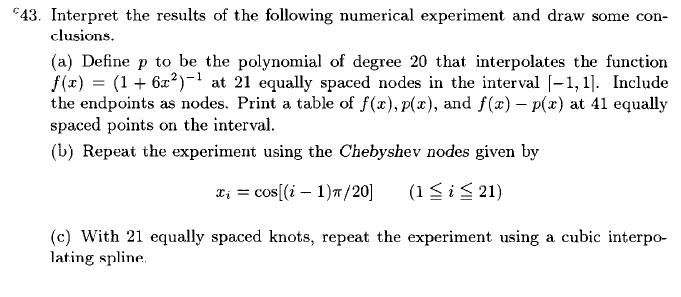

In [1]:
from IPython.display import display, Image
i = Image(filename='image.jpg')
i

Part a polynomial interpolations

In [2]:
import numpy as np


def f(x: float):
    """
    function
    :param x: input
    :return: output
    """
    return 1/(1 + 6 * x ** 2)


def initial(n, f):
    """
    Initialize x and c
    :param n: number of nodes
    :param f: function
    :return: x and c
    """
    c = np.zeros([n + 1, n + 1])
    x = np.arange(-1, 1.01, 0.1)
    c[:, 0] = f(x)
    return x, c


def divideddiff(x, c):
    """
    Divided difference algorithm
    :param x:
    :param c:
    :return: matrix c finished
    """
    n = np.size(x) - 1
    for j in range(1, n + 1):
        for i in range(0, n - j + 1):
            c[i, j] = (c[i + 1, j - 1] - c[i, j - 1]) / (x[i + j] - x[i])
    return c


def poly(inputx, x, c):
    """
    Newton interpolating polynomial
    :param inputx: input value x
    :param x: x from table
    :param c: c from table
    :return: result
    """
    n = np.size(x)
    p = 0
    result = 0
    for j in range(0, n):
        temp = c[0, j]
        for i in range(0, j):
            temp = temp * (inputx - x[i])
        result += temp
    return result


def main():
    """
    Testing method
    :return:
    """
    x, c = initial(n=20, f=f)
    c = divideddiff(x, c)
    print("=========== n = 20 ===========")

    xtest = np.arange(-1, 1.0001, 0.05)
    ytest = np.array(poly(xtest, x, c))
    ftest = np.array(f(xtest))
    print("f(x)")
    print(f(xtest))
    print()
    print("p(x)")
    print(ytest)
    print()
    print("f(x) - p_n(x) for 41 points: ")
    print(ftest - ytest)
    print()


if __name__ == '__main__':
    main()


=========== n = 20 ===========
f(x)
[0.14285714 0.15588465 0.17064846 0.18744142 0.20661157 0.22857143
 0.25380711 0.28288543 0.3164557  0.35523979 0.4        0.45146727
 0.51020408 0.57636888 0.64935065 0.72727273 0.80645161 0.88105727
 0.94339623 0.98522167 1.         0.98522167 0.94339623 0.88105727
 0.80645161 0.72727273 0.64935065 0.57636888 0.51020408 0.45146727
 0.4        0.35523979 0.3164557  0.28288543 0.25380711 0.22857143
 0.20661157 0.18744142 0.17064846 0.15588465 0.14285714]

p(x)
[ 0.14285714 -0.17832013  0.17064846  0.21509981  0.20661157  0.22454988
  0.25380711  0.28374814  0.3164557   0.35498978  0.4         0.45155951
  0.51020408  0.57632782  0.64935065  0.72729329  0.80645161  0.88104711
  0.94339623  0.9852248   1.          0.9852248   0.94339623  0.88104711
  0.80645161  0.72729329  0.64935065  0.57632782  0.51020408  0.45155951
  0.4         0.35498978  0.3164557   0.28374814  0.25380711  0.22454988
  0.20661157  0.21509981  0.17064846 -0.17832013  0.14285714]

Part C cubic spline interpolation

In [3]:
import numpy as np


def f(x: float):
    return 1 / (1 + 6 * x ** 2)


def getY(func):
    x = np.arange(-1, 1.001, 0.1)  # check n = 20
    return x, func(x)


def cubicSpline(t, y):
    n = np.size(y) - 1
    h, b, u, v = np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)
    z = np.zeros(n+1)
    for i in range(0, n):
        h[i] = t[i + 1] - t[i]
        b[i] = 6 * (y[i + 1] - y[i]) / h[i]
    u[1] = 2 * (h[0] + h[1])
    v[1] = b[1] - b[0]
    for i in range(2, n):
        u[i] = 2 * (h[i] + h[i - 1]) - h[i - 1] ** 2 / u[i - 1]
        v[i] = b[i] - b[i - 1] - h[i - 1] * v[i - 1] / u[i - 1]
    for i in reversed(range(1, n)):
        z[i] = (v[i] - h[i] * z[i + 1]) / u[i]
    return z, h


def getEquation(z, h, y):
    A, C = np.zeros(np.size(y) - 1), np.zeros(np.size(y) - 1)
    for i in range(0, np.size(y) - 1):
        A[i] = 1 / (6 * h[i]) * (z[i + 1] - z[i])
        C[i] = - h[i] / 6 * z[i + 1] - h[i] / 3 * z[i] + 1 / h[i] * (y[i + 1] - y[i])
    B = z / 2
    return A, B, C


def splineFunction(x, A, B, C, y, t, i):
    return y[i] + (x - t[i]) * (C[i] + (x - t[i]) * (B[i] + (x - t[i]) * A[i]))


def evaluate(A, B, C, y, t):
    x = np.arange(-1, 1.001, 0.05)  # Check
    i = (x + 1) // 0.101  # Check
    i = i.astype(int)
    result, realresult = np.zeros(np.size(x)), np.zeros(np.size(x))
    for j in range(0, np.size(x)):
        result[j] = splineFunction(x[j], A, B, C, y, t, i[j])
        realresult[j] = f(x[j])
    return result, realresult, abs(result - realresult)


def main():
    x, y = getY(f)
    z, h = cubicSpline(t=x, y=y)
    A, B, C = getEquation(z, h, y)
    result, realresult, diff = evaluate(A, B, C, y, t=x)
    print("f(x)")
    print(realresult)
    print()
    print("p(x)")
    print(result)
    print()
    print("f(x) - p(x)")
    print(diff)


if __name__ == '__main__':
    main()

f(x)
[0.14285714 0.15588465 0.17064846 0.18744142 0.20661157 0.22857143
 0.25380711 0.28288543 0.3164557  0.35523979 0.4        0.45146727
 0.51020408 0.57636888 0.64935065 0.72727273 0.80645161 0.88105727
 0.94339623 0.98522167 1.         0.98522167 0.94339623 0.88105727
 0.80645161 0.72727273 0.64935065 0.57636888 0.51020408 0.45146727
 0.4        0.35523979 0.3164557  0.28288543 0.25380711 0.22857143
 0.20661157 0.18744142 0.17064846 0.15588465 0.14285714]

p(x)
[0.14285714 0.15615251 0.17064846 0.18736647 0.20661157 0.22858723
 0.25380711 0.28287631 0.3164557  0.35523954 0.4        0.45147706
 0.51020408 0.57641475 0.64935065 0.72739024 0.80645161 0.88115582
 0.94339623 0.98496786 1.         0.98496786 0.94339623 0.88115582
 0.80645161 0.72739024 0.64935065 0.57641475 0.51020408 0.45147706
 0.4        0.35523954 0.3164557  0.28287631 0.25380711 0.22858723
 0.20661157 0.18736647 0.17064846 0.15615251 0.14285714]

f(x) - p(x)
[0.00000000e+00 2.67867188e-04 0.00000000e+00 7.49537614e-